In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')


In [2]:
# treat the SVM as an object, to train it
# self to share variabels
class Support_Vector_Machine:
    def _init_(self, visualization=True): # visulize to know how it works
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'} # red and blue
        if self.visualization:
            self.fig = plt.figure() # window
            self.ax = self.fig.add_subplot(1,1,1) 
            # 1by1grid, plotno 1

    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] } 
        opt_dict = {}
        
        transforms = [[1,1],
                      [-1,-1],
                      [-1,1],
                      [1,-1]] # multiplier to transform different values of the same norm
        
        all_data = []
        for yi in self.data: # class
            for  featureset in self.data[yi]: # xi
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors yi(xi.w+b) = 1
        
        step_sizes = [self.max_feature_value * 0.1, 
                     self.max_feature_value * 0.01, 
                     self.max_feature_value * 0.001] # learning rate 0.001 is so expensive 
        
        # extremely expensive 
        b_range_multiple = 5 # b steps
        
        # we dont need to take as small of steps with b as we do w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False # stay False until no more steps are allowed
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                  self.max_feature_value*b_range_multiple, 
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # constraint function yi(xi.w +b) >= 1
                        ### may add a break here
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False # any transformation does not fit, will be thrown out
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]# magnitude of the vector
                
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    # w = [5,5]
                    # step = 1
                    # w - step = [w[0] - step, w[1] - step]
                    w = w - step
                    
            norms = sorted([n for n in opt_dict]) # all norms
            
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1] # ||w|| : [w,b]
            latest_optimum = opt_choice[0][0] + step*2
            
            for i in self.data:
                for xi in self.data[i]:
                    yi = i 
                    print(xi, ':', yi*(np.dot(self.w,xi)+self.b))
    
    def predict(self, features):
        # sign(x.w +b)
        classification = np.sign(np.dot(np.array(features),self.w)+ self.b) # self will be trained
        
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1], s=200, marker='*', c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        for i in data_dict:
            for x in data_dict[i]:
                self.ax.scatter(x[0],x[1],s=100, color=self.colors[i])
        
        # hyperplane x.w+b
        # v = x.w+b
        # psv = 1, nsv = 1, dec = 0
        def hyperplane(x,w,b,v): # v is the value we are seeking for # for human visualization
            return (-w[0]*x-b+v)/ w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # positive suppor vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
        
        # (w.x+b) = -1
        # negative suppor vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')
        
        # (w.x+b) = 0
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.show()


        
data_dict = {-1:np.array([[1,7], 
                          [2,8],
                          [3,8]]),
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}        
        
        
        
        
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
             [1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]

#for p in predict_us:
#    svm.predict(p)

svm.visualize()

Optimized a step.
[1 7] : 4.799999999999098
[2 8] : 4.799999999999098
[3 8] : 3.9999999999992486
[5 1] : 3.199999999999399
[ 6 -1] : 5.599999999998948
[7 3] : 3.199999999999399
Optimized a step.
[1 7] : 1.5199999999992362
[2 8] : 1.5199999999992362
[3 8] : 1.1999999999993876
[5 1] : 1.6799999999992516
[ 6 -1] : 2.639999999998798
[7 3] : 1.6799999999992516
Optimized a step.
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


AttributeError: 'Support_Vector_Machine' object has no attribute 'ax'

{-1: array([[1, 7],
       [2, 8],
       [3, 8]]), 1: array([[ 5,  1],
       [ 6, -1],
       [ 7,  3]])}
optimized a step
[1 7] : 4.799999999999098
[2 8] : 4.799999999999098
[3 8] : 3.9999999999992486
[5 1] : 3.199999999999399
[ 6 -1] : 5.599999999998948
[7 3] : 3.199999999999399
optimized a step
[1 7] : 1.5199999999992362
[2 8] : 1.5199999999992362
[3 8] : 1.1999999999993876
[5 1] : 1.6799999999992516
[ 6 -1] : 2.639999999998798
[7 3] : 1.6799999999992516
optimized a step
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


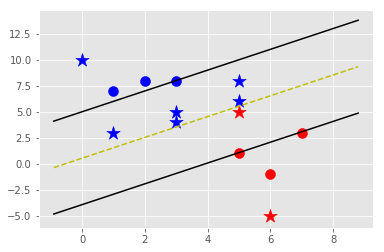

In [3]:
class Support_Vector_Machine:


    def __init__(self, visualization=True):        
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}        
        if self.visualization:            
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)            
#-----------------------  init END-------------------------------------
            
            
    #train
    def fit(self,data):
        self.data = data
        #( ||w||: [w,b]}
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None


        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]
        #           More steps more refined answer
        #               self.max_features_value * 0.0001,]
        #This makes yi(xi*w+b)=1 closer to 1
        #e.g 1.01 or 1.0001 never >1 as the loop yi(xi*w+b) >=1 
        #extermely expensive
        #more optimized greater costs time
        b_range_multiple = 5
        #We do need need to take as small of steps with b as we do with w 
        b_multiple = 5

        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w=np.array([latest_optimum,latest_optimum])
            optimized = False
            while not optimized:
                #Can be threaded ---
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                   for transformation in transforms:
                        w_t=w*transformation
                        #print(w_t)
                        found_option = True
                        #weakest like in the SVM fundamentally
                        #SMO attempts to fix this a bit
                        #yi(xi*w+b) >=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    #print(w_t,b)
                                    found_option = False
                                    #break
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            #Threads end

                if w[0]<0:
                    optimized=True
                    print('optimized a step')
                else:
                    #w=[5,5]
                    #step=1
                    #w-[step,step]
                    w= w-step
            #||w||:[w,b]
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w=opt_choice[0]
            self.b=opt_choice[1]
            #This number should be soft coded later *2
            latest_optimum = opt_choice[0][0]+step*2

            for i in self.data:
                for xi in self.data[i]:
                    yi=i
                    print(xi,':',yi*(np.dot(self.w,xi)+self.b))
#-----------------------  def fit END-------------------------------------

            
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*', c=self.colors[classification])            
        return classification
#-----------------------  predict END-------------------------------------
    
# Humans like this function and the value(v)
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        #hyperplane = x*w+b and we are seeking value (v)
        #v=x.w+b
        #psv =
        #nsv = -1
        #decition line = 0
        def hyperplane(x,w,b,v):
            return(-w[0]*x-b+v)/ w[1]
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        
        #w.x+b = 1        
        #positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
                     
        #w.x+b = -1
        #negitive support vector hyperplane
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        #w.x+b = 0
        #positive support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.show()

#---------------------visualize END-------------------------------------
#---------------------CLASS END-------------------------------------
        
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),
             1:np.array([[5,1],[6,-1],[7,3]])}

print(data_dict)

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)
svm.visualize()